### Вариант 9

In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
data = np.load('../18_11/data/data_v9.npy') * 2 * np.pi

Считаем к-ты Фурье, разложить по синусам и косинусам

In [155]:
N = len(data)
period = 2 * np.pi
N_appr = 20
cos_coeff = np.zeros(N_appr)
sin_coeff = np.zeros(N_appr)
for k in range(N_appr):
    cos_coeff[k] = np.sum(np.cos(data * k)) / N
    sin_coeff[k] = np.sum(np.sin(data * k)) / N
    
x_axis = np.linspace(-period/2, period/2)
function = np.zeros_like(x_axis)
for k in range(1, N_appr):
    function += (cos_coeff[k] * np.cos(k * x_axis) + sin_coeff[k] * np.sin(k * x_axis)) * 2 / (period)
    
function += cos_coeff[0] * np.ones_like(x_axis) / (period)


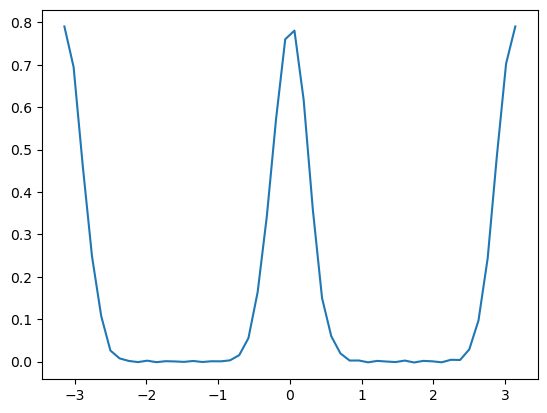

In [156]:
plt.plot(x_axis, function)

(array([0.39247723, 0.00461551, 0.        , 0.00469508, 0.38658848,
        0.39852514, 0.00596833, 0.        , 0.00413804, 0.39454625]),
 array([-3.14159265e+00, -2.51327595e+00, -1.88495925e+00, -1.25664254e+00,
        -6.28325840e-01, -9.13658989e-06,  6.28307567e-01,  1.25662427e+00,
         1.88494097e+00,  2.51325768e+00,  3.14157438e+00]),
 <BarContainer object of 10 artists>)

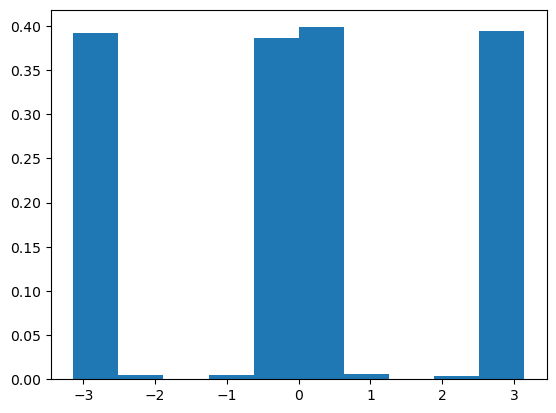

In [157]:
plt.hist(data, density=True)

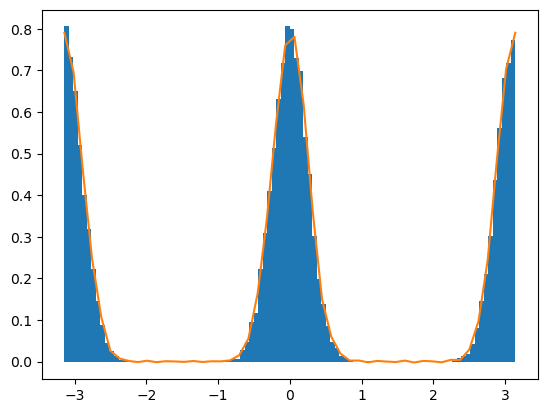

In [162]:
plt.hist(data, bins=100, density=True)
plt.plot(x_axis, function)

Оценка коэффициентов по частичной выборке

In [159]:
def regularization(k, alpha, N_appr, p = 0.3):
    mu_k = k ** (2 + p)
    if k <= N_appr - 1:
        return 1 / (1 + alpha * mu_k)
    else:
        return 0

In [160]:
windowSize = 200

startPoint = np.random.randint(0, N - 1 - windowSize)

print(startPoint / N)

dataSlice = data[startPoint:startPoint+windowSize]
NSlice = len(dataSlice)
period = 2 * np.pi
N_appr = 20
cos_coeff = np.zeros(N_appr)
sin_coeff = np.zeros(N_appr)
for k in range(N_appr):
    regul = regularization(k, 1e-3, N_appr)
    cos_coeff[k] = regul * np.sum(np.cos(dataSlice * k)) / NSlice
    sin_coeff[k] = regul * np.sum(np.sin(dataSlice * k)) / NSlice
    
x_axis = np.linspace(-period/2, period/2)
function_appr = np.zeros_like(x_axis)
for k in range(1, N_appr):
    function_appr += (cos_coeff[k] * np.cos(k * x_axis) + sin_coeff[k] * np.sin(k * x_axis)) * 2 / (period)
    
function_appr += cos_coeff[0] * np.ones_like(x_axis) / (period)

0.97655


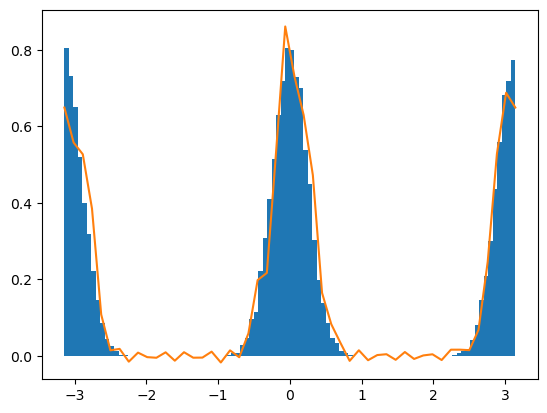

In [161]:
plt.hist(data, bins=100, density=True)
plt.plot(x_axis, function_appr)